In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers

In [17]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "C:/program1/class/seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [18]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [19]:
y=df['Class']
y.value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

In [20]:
#기본 딥러닝
#one hot encoding 하기

y = pd.get_dummies(y).values

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,-0.746116,-0.659724,-1.022187,-0.476551,-0.906322,-0.254136,-0.348533
1,0.622328,0.695258,0.184523,0.954009,0.571724,-1.096600,0.963359
2,-0.432158,-0.523469,0.747049,-0.614490,-0.252674,-0.732597,-0.456165
3,1.277543,1.270557,0.719830,1.176491,1.129326,-1.297567,0.997883
4,1.311669,1.414382,-0.037766,1.470167,0.915890,0.467881,1.420288
...,...,...,...,...,...,...,...
152,-0.271767,-0.190400,-0.368930,-0.033812,-0.247338,-0.978814,-0.549582
153,-1.002059,-1.151756,0.402275,-1.095051,-0.794268,-0.060489,-0.549582
154,1.482298,1.444661,0.833243,1.381174,1.505507,-0.401866,1.588844
155,0.062665,0.013982,0.801487,-0.120580,0.336944,-0.485714,-0.462258


In [22]:
y_train

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0,

In [23]:
print(X_train.shape, y_train.shape)

(157, 7) (157, 3)


In [24]:
print(X_test.shape, y_test.shape)

(53, 7) (53, 3)


In [25]:
# 신경망 모델 구축
inputs = Input(shape=(X_train.shape[1],))

x = Dense(32, activation='relu')(inputs)
x = Dense(24, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# 신경망 훈련, 검증 데이터 전달, 조기종료 적용
early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=40, batch_size=144, validation_data=(X_test, y_test), callbacks = [early_stopping], verbose=2)

Epoch 1/40
2/2 - 1s - loss: 1.1466 - accuracy: 0.2739 - val_loss: 1.0881 - val_accuracy: 0.3774 - 815ms/epoch - 408ms/step
Epoch 2/40
2/2 - 0s - loss: 1.1072 - accuracy: 0.3312 - val_loss: 1.0602 - val_accuracy: 0.4151 - 34ms/epoch - 17ms/step


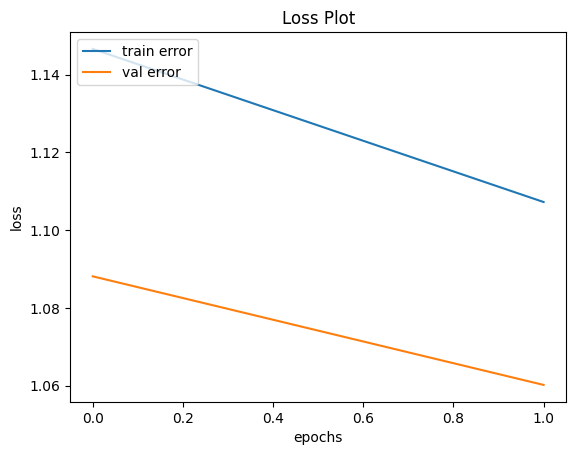

In [27]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력, 조기종료 적용
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

In [28]:
#CNN
import pandas as pd

# 데이터 파일 경로 설정
file_path = "C:/program1/class/seeds_dataset.txt"

# 데이터 파일 읽기
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [29]:
X=df.drop('Class', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [30]:
y=df['Class']
y.value_counts()

1    70
2    70
3    70
Name: Class, dtype: int64

In [31]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

y_train.shape
X_test.shape

(53, 7)

In [33]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :7], sequences[end_ix-1, 7:]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [34]:
y_train.shape

(157, 3)

In [35]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# 7개의 features와 3개의 label이 합쳐진 train_set, test_set
print(train_set)

[[12.62   13.67    0.8481 ...  0.      0.      1.    ]
 [16.63   15.46    0.8747 ...  1.      0.      0.    ]
 [13.54   13.85    0.8871 ...  1.      0.      0.    ]
 ...
 [19.15   16.45    0.889  ...  0.      1.      0.    ]
 [14.99   14.56    0.8883 ...  1.      0.      0.    ]
 [11.27   12.97    0.8419 ...  0.      0.      1.    ]]


In [36]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(153, 5, 7) (153, 3)
(49, 5, 7) (49, 3)


In [37]:
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [38]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 7 3


In [39]:
X_train.shape[1]

5

In [40]:
# 신경망 모델 구축
inputs = Input(shape=(n_timesteps, n_features,))

x = Conv1D(32, 2, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x) # 드롭아웃으로 노드 비활성화
x = Flatten()(x)
prediction = Dense(n_outputs, activation='softmax')(x)

model = Model(inputs=inputs, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 7)]            0         
                                                                 
 conv1d (Conv1D)             (None, 4, 32)             480       
                                                                 
 dense_8 (Dense)             (None, 4, 64)             2112      
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3,363
Trainable params: 3,363
Non-trainable p

In [41]:
from keras.callbacks import EarlyStopping

# 신경망 훈련, 검증 데이터 전달
#  callbacks = [early_stopping],
early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=144, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
2/2 - 1s - loss: 4.5149 - accuracy: 0.3856 - val_loss: 2.8778 - val_accuracy: 0.2653 - 659ms/epoch - 330ms/step
Epoch 2/20
2/2 - 0s - loss: 3.2012 - accuracy: 0.3464 - val_loss: 2.0509 - val_accuracy: 0.3061 - 35ms/epoch - 18ms/step
Epoch 3/20
2/2 - 0s - loss: 2.9362 - accuracy: 0.3529 - val_loss: 1.4650 - val_accuracy: 0.3061 - 30ms/epoch - 15ms/step
Epoch 4/20
2/2 - 0s - loss: 2.6536 - accuracy: 0.3203 - val_loss: 1.2422 - val_accuracy: 0.4490 - 28ms/epoch - 14ms/step
Epoch 5/20
2/2 - 0s - loss: 2.2686 - accuracy: 0.3922 - val_loss: 1.3227 - val_accuracy: 0.4082 - 31ms/epoch - 16ms/step
Epoch 6/20
2/2 - 0s - loss: 2.5562 - accuracy: 0.3399 - val_loss: 1.3128 - val_accuracy: 0.4082 - 30ms/epoch - 15ms/step
Epoch 7/20
2/2 - 0s - loss: 2.4884 - accuracy: 0.3072 - val_loss: 1.2327 - val_accuracy: 0.4082 - 29ms/epoch - 14ms/step
Epoch 8/20
2/2 - 0s - loss: 2.2867 - accuracy: 0.3464 - val_loss: 1.1175 - val_accuracy: 0.4082 - 30ms/epoch - 15ms/step
Epoch 9/20
2/2 - 0s - loss: 2.

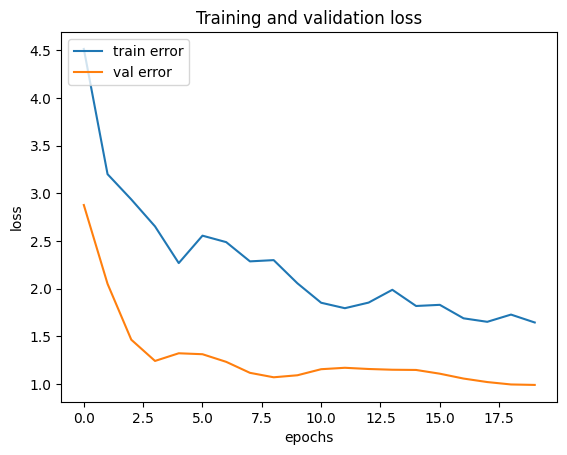

In [42]:
# 훈련 데이터와 손실값의 검증 데이터의 손실값을 그래프에 출력

history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실 값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실 값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

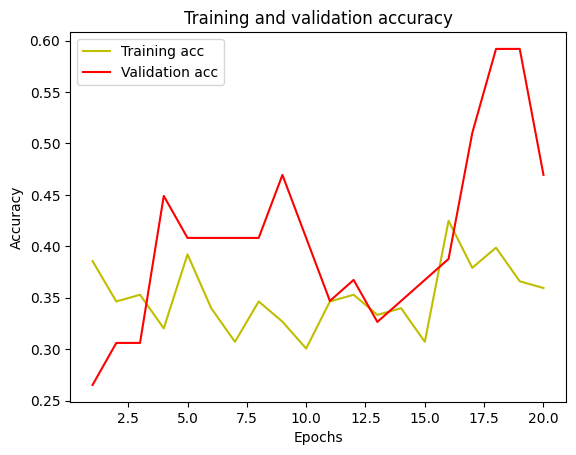

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()